In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

---
## *Exercise: Time Series (ARIMA)*

*Gunakan dataset AirPassengers*

1. Lakukan EDA.
2. Cek apakah data sudah stasioner? Jika belum, lakukan differencing.
3. Gunakan ADF test untuk mengecek stasionerity data secara statistik.
4. Cari model ARIMA terbaik melalui grafik ACF & PACF.
5. Buat modelnya dan lakukan forecasting untuk periode 1 tahun (Jan-Dec 1961).

In [34]:
df = pd.read_csv('AirPassengers.csv.xls')

In [35]:
df['TravelDate'].unique()

array(['1/1/1949', '2/1/1949', '3/1/1949', '4/1/1949', '5/1/1949',
       '6/1/1949', '7/1/1949', '8/1/1949', '9/1/1949', '10/1/1949',
       '11/1/1949', '12/1/1949', '1/1/1950', '2/1/1950', '3/1/1950',
       '4/1/1950', '5/1/1950', '6/1/1950', '7/1/1950', '8/1/1950',
       '9/1/1950', '10/1/1950', '11/1/1950', '12/1/1950', '1/1/1951',
       '2/1/1951', '3/1/1951', '4/1/1951', '5/1/1951', '6/1/1951',
       '7/1/1951', '8/1/1951', '9/1/1951', '10/1/1951', '11/1/1951',
       '12/1/1951', '1/1/1952', '2/1/1952', '3/1/1952', '4/1/1952',
       '5/1/1952', '6/1/1952', '7/1/1952', '8/1/1952', '9/1/1952',
       '10/1/1952', '11/1/1952', '12/1/1952', '1/1/1953', '2/1/1953',
       '3/1/1953', '4/1/1953', '5/1/1953', '6/1/1953', '7/1/1953',
       '8/1/1953', '9/1/1953', '10/1/1953', '11/1/1953', '12/1/1953',
       '1/1/1954', '2/1/1954', '3/1/1954', '4/1/1954', '5/1/1954',
       '6/1/1954', '7/1/1954', '8/1/1954', '9/1/1954', '10/1/1954',
       '11/1/1954', '12/1/1954', '1/1/1955', '

<AxesSubplot: xlabel='TravelDate', ylabel='Passengers'>

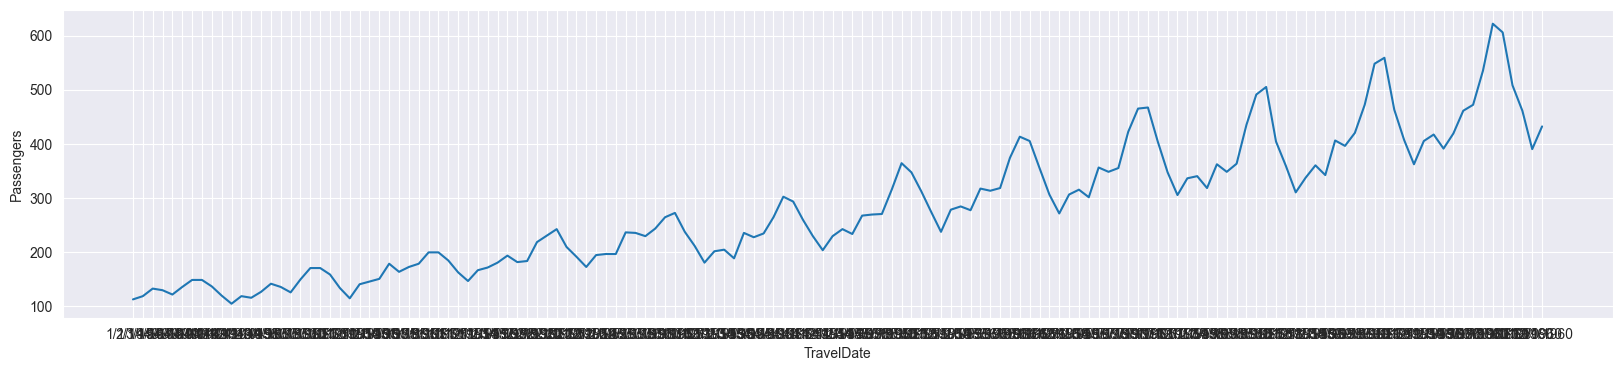

In [36]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,4))
sns.lineplot(data= df,x = 'TravelDate',y= 'Passengers')

# datanya belum stationer --> harus dilakukan differencing

## cek stationary dengan adfuller test

- ho: tidak stationery
- h1: statiotnery

In [37]:
pvalue = adfuller(df['Passengers'])[1]
pvalue

## pvalue > 0.05 fail to reject ho so data stationer


0.991880243437641

In [38]:
pvaluediff1 = adfuller(df['Passengers'].diff().dropna())[1]
pvaluediff1

## pvalue > 0.05 fail reject ho so data stationer

0.0542132902838255

In [39]:
pvaluediff2 = adfuller(df['Passengers'].diff().diff().dropna())[1]
## pvalue < 0.05 reject ho so data stationer

ACF-PACF

- dari grafik kita bisa menentukan stationer atau tidak, data tidak stationer kalau polanya slowly decaying

- untuk menentukan hyperparameter (p,d,q) terbaik

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Summary ACF-PACF:

Pada differencing orde 1 data sudah stationer --> I(d) = 1

memiliih hyperparameter terbaik untuk arima berdasarkan acf pacf:
- AR: 1(PACF cutoff)
- I : 1(Differencing orde 1)
- MA: 0(ACF tails off)

jadi kita kan menggunakan ARIMA (1,1,0)



Summary ACF-PACF:

Pada differencing orde 1 data sudah stationer --> I(d) = 1

memiliih hyperparameter terbaik untuk arima berdasarkan acf pacf:
- AR: 1(PACF cutoff)
- I : 1(Differencing orde 1)
- MA: 0(ACF tails off)

jadi kita kan menggunakan ARIMA (1,1,0)



Summary ACF-PACF:

Pada differencing orde 1 data sudah stationer --> I(d) = 1

memiliih hyperparameter terbaik untuk arima berdasarkan acf pacf:
- AR: 1(PACF cutoff)
- I : 1(Differencing orde 1)
- MA: 0(ACF tails off)

jadi kita kan menggunakan ARIMA (1,1,0)



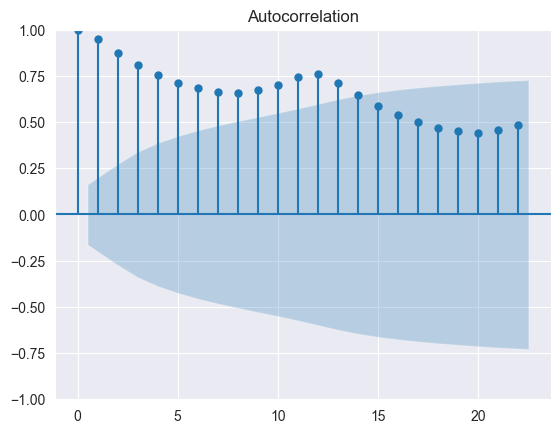

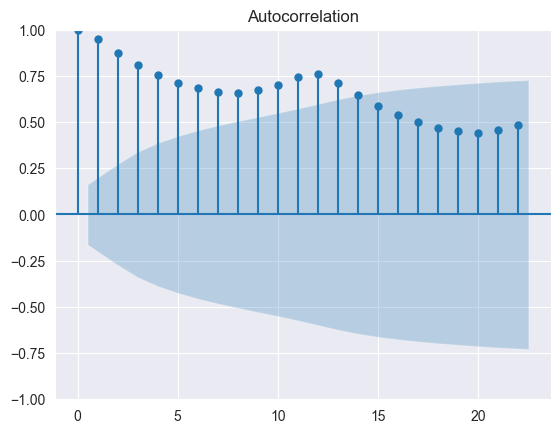

In [41]:
plot_acf(df['Passengers'])

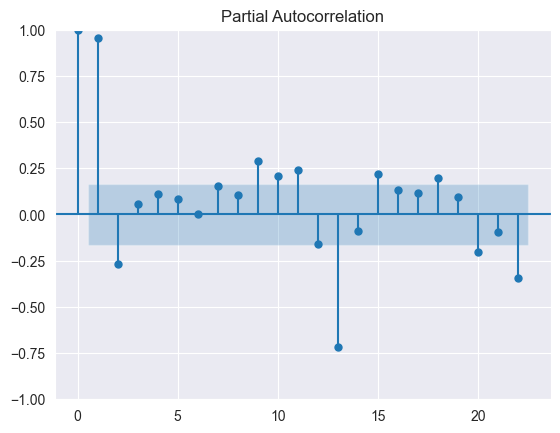

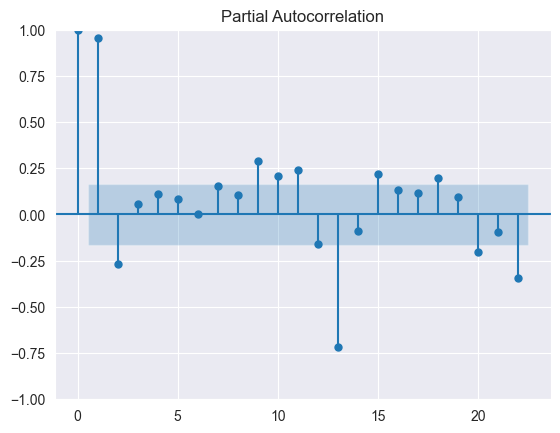

In [42]:
plot_pacf(df['Passengers'])

In [43]:
df['Passengers_diff1'] = df['Passengers'].diff()
df['Passengers_diff2'] = df['Passengers'].diff().diff()

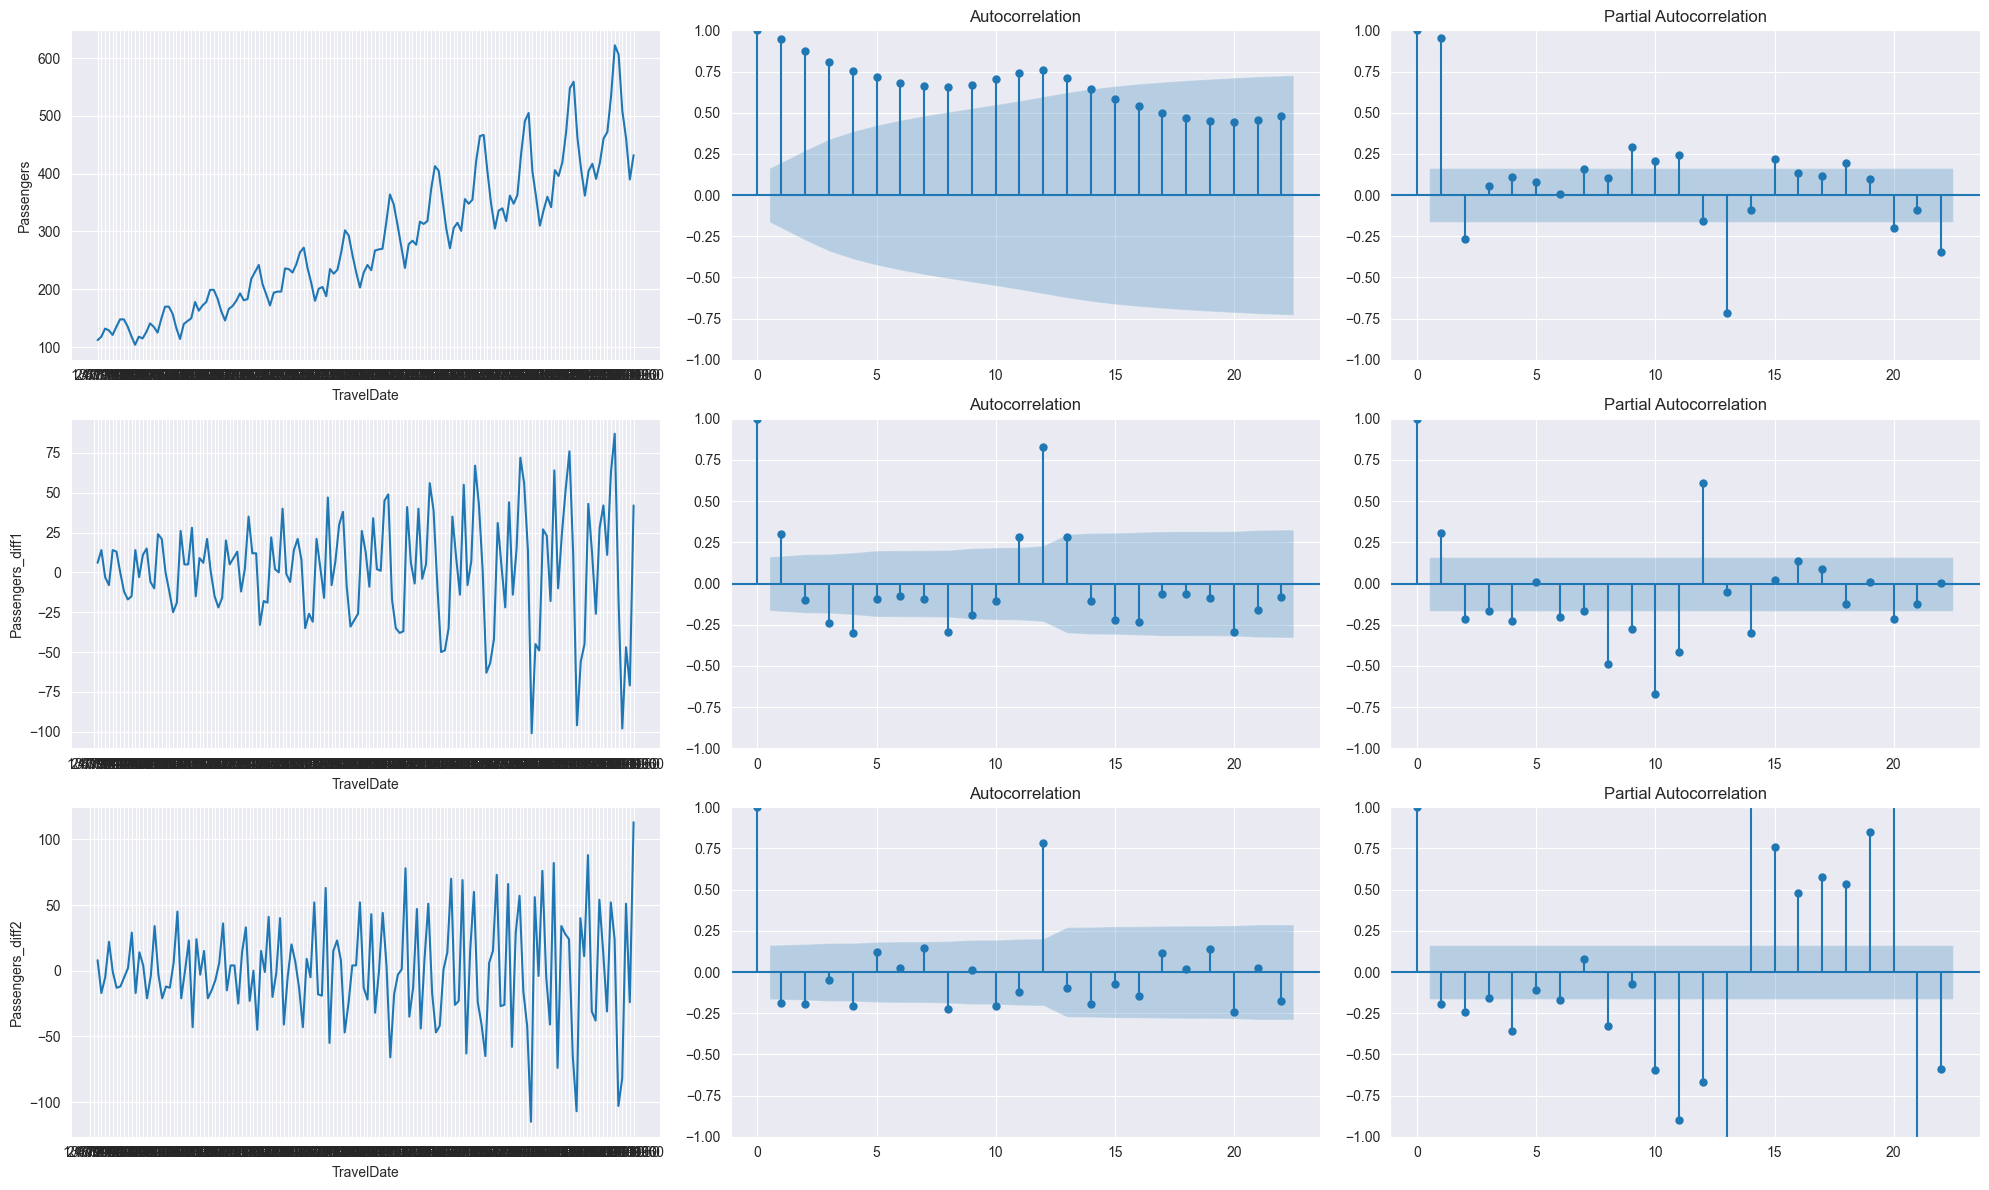

In [44]:
fig,axes = plt.subplots(3,3, figsize=(20,12))

# Dataset asli 
sns.lineplot(data=df,x='TravelDate',y = 'Passengers', ax=axes[0,0])
plot_acf(df['Passengers'], ax=axes[0,1])
plot_pacf(df['Passengers'], ax=axes[0,2])

# Differencing orde 1
sns.lineplot(data=df,x='TravelDate',y = 'Passengers_diff1', ax=axes[1,0])
plot_acf(df['Passengers_diff1'].dropna(), ax=axes[1,1])
plot_pacf(df['Passengers_diff1'].dropna(), ax=axes[1,2])

# Differencing orde 2
sns.lineplot(data=df,x='TravelDate',y = 'Passengers_diff2', ax=axes[2,0])
plot_acf(df['Passengers_diff2'].dropna(), ax=axes[2,1])
plot_pacf(df['Passengers_diff2'].dropna(), ax=axes[2,2])

plt.tight_layout()
plt.show()

Summary ACF-PACF:

Pada differencing orde 2 data sudah stationer --> I(d) = 2

memiliih hyperparameter terbaik untuk arima berdasarkan acf pacf:
- AR: 13(PACF cutoff)
- I : 2(Differencing orde 1)
- MA: 0(ACF cutoff)

jadi kita kan menggunakan ARIMA (13,2,0)



In [45]:
# # Define Model
# arima_110 = ARIMA(df['Passengers'], order=(12,2,0))

# # fit
# arima_110_fit = arima_110.fit()

# #Summary 
# print(arima_110_fit.summary())

In [46]:
for i in range(23):

    # Define Model
    arima_1220 = ARIMA(df['Passengers'], order=(i,2,0))

    # fit
    arima_1220_fit = arima_110.fit()

    #Summary 
    print(i)
    print(arima_1220_fit.aic)

0
1168.7720069812963
1
1168.7720069812963
2
1168.7720069812963
3
1168.7720069812963
4
1168.7720069812963
5
1168.7720069812963
6
1168.7720069812963
7
1168.7720069812963
8
1168.7720069812963
9
1168.7720069812963
10
1168.7720069812963
11
1168.7720069812963
12
1168.7720069812963
13
1168.7720069812963
14
1168.7720069812963
15
1168.7720069812963
16
1168.7720069812963
17
1168.7720069812963
18
1168.7720069812963
19
1168.7720069812963
20
1168.7720069812963
21
1168.7720069812963
22
1168.7720069812963


In [47]:
# Prediksi berapa bulan kedepan

forecast_length = 12

#forecast (predict)
forecast_result = arima_1220_fit.forecast(forecast_length)
forecast_result





144    452.596131
145    407.782696
146    445.538751
147    485.021388
148    507.844850
149    574.405798
150    677.410896
151    651.187011
152    573.534301
153    519.468757
154    456.132028
155    488.916202
Name: predicted_mean, dtype: float64

In [48]:
df.head(1)

,TravelDate,Passengers,Passengers_diff1,Passengers_diff2
0,1/1/1949,112,NaN,NaN


In [49]:
list_bulan = [f'{bulan}/1/1961' for bulan in range(1,13)]
list_bulan

['1/1/1961',
 '2/1/1961',
 '3/1/1961',
 '4/1/1961',
 '5/1/1961',
 '6/1/1961',
 '7/1/1961',
 '8/1/1961',
 '9/1/1961',
 '10/1/1961',
 '11/1/1961',
 '12/1/1961']

In [50]:
df_forecast = pd.DataFrame({
    'Month':list_bulan,
    'Sales': forecast_result
})

df_forecast

,Month,Sales
144,1/1/1961,452.596131
145,2/1/1961,407.782696
146,3/1/1961,445.538751
147,4/1/1961,485.021388
148,5/1/1961,507.844850
149,6/1/1961,574.405798
150,7/1/1961,677.410896
151,8/1/1961,651.187011
152,9/1/1961,573.534301
153,10/1/1961,519.468757


In [51]:
df_concat = pd.concat([df.iloc[:,:2],df_forecast])

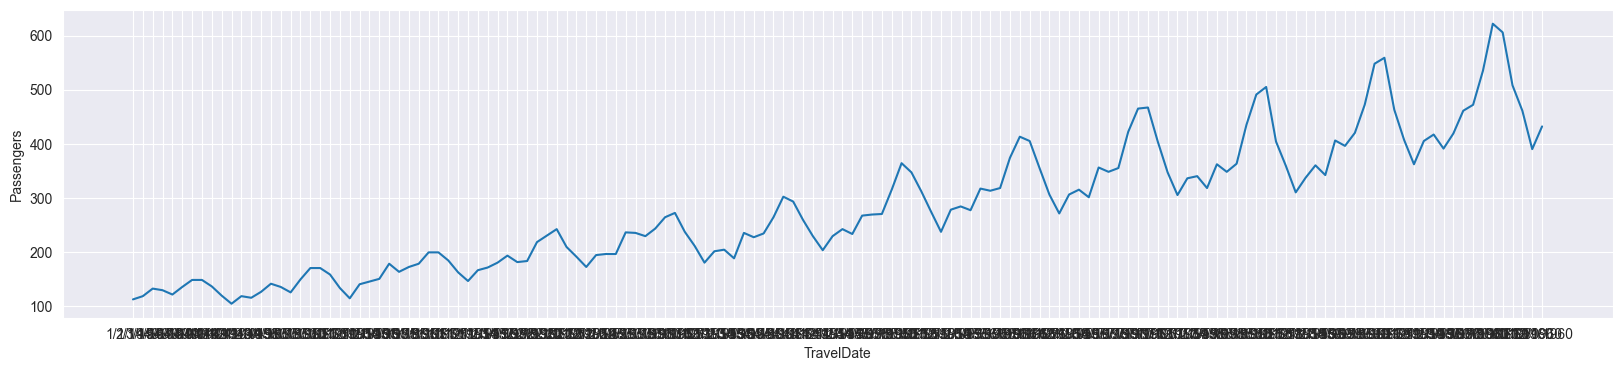

In [52]:
plt.figure(figsize=(20,4))
sns.lineplot(data=df_concat,x='TravelDate',y='Passengers');

- Hasil forecasting dengan arima 12,2,0 sudah cukup bagus 
- Sudah mengecek kombinasi signifikan yang lain, dan 12,2,0 tetap yang terbagus

# Modeling ARIMA

In [53]:
from statsmodels.tsa.arima.model import ARIMA

In [54]:
# Define Model
arima_1220 = ARIMA(df['Passengers'], order=(12,2,0))

# fit
arima_1220_fit = arima_1220.fit()

#Summary 
print(arima_1220_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                ARIMA(12, 2, 0)   Log Likelihood                -557.983
Date:                Mon, 06 Feb 2023   AIC                           1141.966
Time:                        09:14:49   BIC                           1180.392
Sample:                             0   HQIC                          1157.581
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2432      0.092    -13.540      0.000      -1.423      -1.063
ar.L2         -1.3061      0.091    -14.275      0.000      -1.485      -1.127
ar.L3         -1.2577      0.095    -13.203      0.0

# Forecasting

In [55]:
# Prediksi berapa bulan kedepan

forecast_length = 12

#forecast (predict)
forecast_result = arima_1220_fit.forecast(forecast_length)
forecast_result





144    450.636677
145    416.530542
146    445.516162
147    479.752285
148    508.426445
149    561.136834
150    649.221657
151    628.325142
152    540.893239
153    486.616307
154    424.324379
155    460.869990
Name: predicted_mean, dtype: float64

In [56]:
# buat nama bulan (jan-jun 2004)

list_bulan = [f'{bulan}/1/1961' for bulan in range(1,13)]

In [57]:
df_forecast = pd.DataFrame({
    'TravelDate':list_bulan,
    'Sales': forecast_result
})

df_forecast

,TravelDate,Sales
144,1/1/1961,450.636677
145,2/1/1961,416.530542
146,3/1/1961,445.516162
147,4/1/1961,479.752285
148,5/1/1961,508.426445
149,6/1/1961,561.136834
150,7/1/1961,649.221657
151,8/1/1961,628.325142
152,9/1/1961,540.893239
153,10/1/1961,486.616307


In [58]:
df_concat = pd.concat([df.iloc[:,:2],df_forecast])

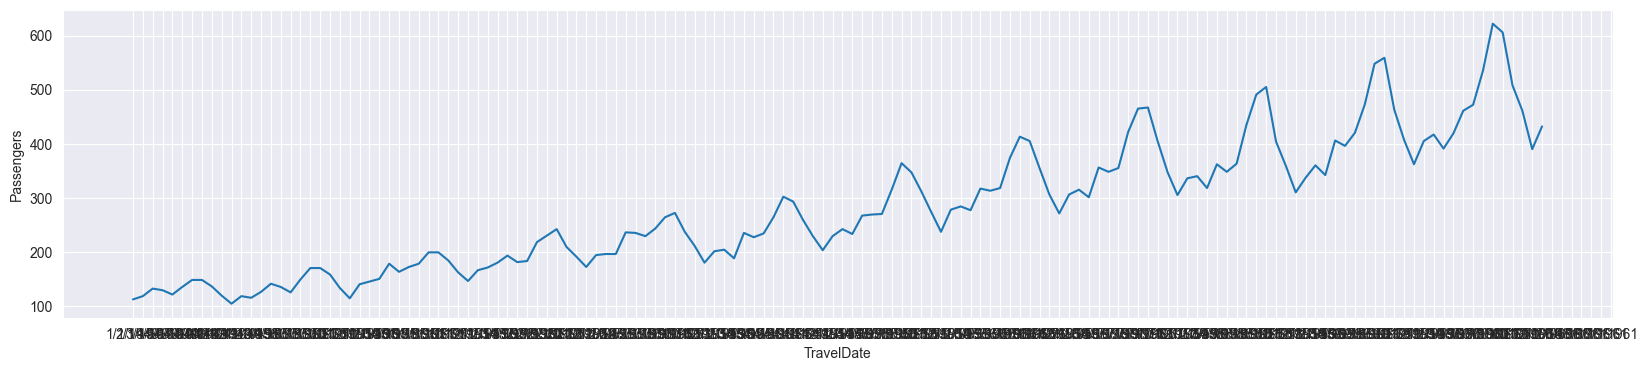

In [59]:
plt.figure(figsize=(20,4))
sns.lineplot(data=df_concat,x='TravelDate',y='Passengers');

In [60]:
import plotly.graph_objects as go

In [61]:
df_forecast = pd.concat([df.iloc[[-1],:2],df_forecast])

In [62]:
fig = go.Figure()

# Scattrplot
data_asli = go.Scatter(x=df['TravelDate'], y = df['Passengers'], name='Ori')
data_forecast = go.Scatter(x=df_forecast['TravelDate'], y = df_forecast['Passengers'], name='Forecast')

#masukan scatterplot ke fig
fig.add_traces(data_asli)
fig.add_traces(data_forecast)
fig.show()

- Hasil forecasting dengan arim 110 masih kurang bagus 
- Kita bisa coba combination hyperparameter yang lain:
    - ARIMA(10,1,0)
    - ARIMA(11,1,0)
    - ARIMA(12,1,0)
    - dll (yg featurenya signifikan)